___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [180]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer 
from yellowbrick.classifier import PrecisionRecallCurve

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, cross_val_predict, KFold
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix, average_precision_score
from sklearn.metrics import roc_auc_score, auc, roc_curve, precision_recall_curve, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from scikitplot.metrics import plot_precision_recall
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import scale, StandardScaler, PolynomialFeatures, OneHotEncoder, OrdinalEncoder, PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesRegressor
from sklearn.utils import class_weight
from sklearn.metrics import matthews_corrcoef, cohen_kappa_score

from imblearn.over_sampling import SMOTE, RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

from scikitplot.metrics import plot_roc

from xgboost import XGBClassifier, plot_importance
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

ImportError: cannot import name 'RandomUnderSampler' from 'imblearn.over_sampling' (C:\Users\Mustafa\anaconda3\lib\site-packages\imblearn\over_sampling\__init__.py)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
df_male = pd.read_csv("ANSUR II MALE Public.csv", encoding= 'ISO-8859-1')

In [3]:
df_m = df_male.copy()
df_m.head().T

,0,1,2,3,4
subjectid,10027,10032,10033,10092,10093
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
axillaheight,1347,1293,1327,1239,1478
balloffootcircumference,253,245,256,262,267
balloffootlength,202,193,196,199,224
biacromialbreadth,401,394,427,401,435
bicepscircumferenceflexed,369,338,408,359,356


In [4]:
df_female = pd.read_csv("ANSUR II FEMALE Public.csv", encoding= 'ISO-8859-1')

In [5]:
df_f = df_female.copy()
df_f.head().T
# "SubjectId" değişkeninin ismi yukardakinden farklı, eşitlemek lazım

,0,1,2,3,4
SubjectId,10037,10038,10042,10043,10051
abdominalextensiondepthsitting,231,194,183,261,309
acromialheight,1282,1379,1369,1356,1303
acromionradialelength,301,320,329,306,308
anklecircumference,204,207,233,214,214
axillaheight,1180,1292,1271,1250,1210
balloffootcircumference,222,225,237,240,217
balloffootlength,177,178,196,188,182
biacromialbreadth,373,372,397,384,378
bicepscircumferenceflexed,315,272,300,364,320


In [6]:
df_m.columns == df_f.columns

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [7]:
df_m.columns = df_m.columns.str.lower()
df_f.columns = df_f.columns.str.lower()

In [8]:
df_m.head().T

,0,1,2,3,4
subjectid,10027,10032,10033,10092,10093
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
axillaheight,1347,1293,1327,1239,1478
balloffootcircumference,253,245,256,262,267
balloffootlength,202,193,196,199,224
biacromialbreadth,401,394,427,401,435
bicepscircumferenceflexed,369,338,408,359,356


In [9]:
df_f.head().T

,0,1,2,3,4
subjectid,10037,10038,10042,10043,10051
abdominalextensiondepthsitting,231,194,183,261,309
acromialheight,1282,1379,1369,1356,1303
acromionradialelength,301,320,329,306,308
anklecircumference,204,207,233,214,214
axillaheight,1180,1292,1271,1250,1210
balloffootcircumference,222,225,237,240,217
balloffootlength,177,178,196,188,182
biacromialbreadth,373,372,397,384,378
bicepscircumferenceflexed,315,272,300,364,320


In [10]:
df_m.columns == df_f.columns
# column isimleri her iki veri setinde de aynı

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [11]:
print(df_m.info(), '\n')
print("------------------", '\n')
print(df_f.info())

# column sayıları iki veri setinde de 108

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Columns: 108 entries, subjectid to writingpreference
dtypes: int64(99), object(9)
memory usage: 3.4+ MB
None 

------------------ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Columns: 108 entries, subjectid to writingpreference
dtypes: int64(99), object(9)
memory usage: 1.6+ MB
None


In [12]:
df_m.isnull().sum().any()

True

In [13]:
df_f.isnull().sum().any()

# her iki veri setinde de null değerler var

True

In [14]:
def missing(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

# null değerlerin sayısı ve oranını veren fonksiyon

In [15]:
missing(df_m)[:5]

# sadece ethnicity'de null değerler var

,Missing_Number,Missing_Percent
ethnicity,3180,0.779
subjectid,0,0.000
radialestylionlength,0,0.000
thighcircumference,0,0.000
tenthribheight,0,0.000


In [16]:
missing(df_f)[:5]

# sadece ethnicity'de null değerler var

,Missing_Number,Missing_Percent
ethnicity,1467,0.739
subjectid,0,0.000
radialestylionlength,0,0.000
thighcircumference,0,0.000
tenthribheight,0,0.000


In [17]:
df_all = pd.concat([df_m,df_f])
df = df_all.copy()

In [18]:
df.head().T

,0,1,2,3,4
subjectid,10027,10032,10033,10092,10093
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
axillaheight,1347,1293,1327,1239,1478
balloffootcircumference,253,245,256,262,267
balloffootlength,202,193,196,199,224
biacromialbreadth,401,394,427,401,435
bicepscircumferenceflexed,369,338,408,359,356


In [19]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6068 entries, 0 to 1985
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [20]:
df.shape

(6068, 108)

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subjectid,6068.000,20757.198,13159.391,10027.000,14841.750,20063.500,27234.500,920103.000
abdominalextensiondepthsitting,6068.000,246.469,37.400,155.000,219.000,242.000,271.000,451.000
acromialheight,6068.000,1406.161,79.091,1115.000,1350.000,1410.000,1462.000,1683.000
acromionradialelength,6068.000,327.374,20.720,249.000,313.000,328.000,341.250,393.000
anklecircumference,6068.000,224.891,16.052,156.000,214.000,225.000,235.000,293.000
axillaheight,6068.000,1299.609,72.022,1038.000,1249.000,1302.000,1349.000,1553.000
balloffootcircumference,6068.000,244.193,16.845,186.000,232.000,245.000,256.000,306.000
balloffootlength,6068.000,194.755,13.516,151.000,185.000,195.000,204.000,245.000
biacromialbreadth,6068.000,399.204,30.237,283.000,376.000,404.000,421.000,489.000
bicepscircumferenceflexed,6068.000,340.934,41.520,216.000,311.000,341.000,370.000,490.000


In [22]:
df.describe(include="object").T

,count,unique,top,freq
gender,6068,2,Male,4082
date,6068,253,27-Feb-12,45
installation,6068,12,Camp Shelby,1160
component,6068,3,Regular Army,3140
branch,6068,3,Combat Service Support,3174
primarymos,6068,285,11B,671
subjectsbirthlocation,6068,152,California,446
ethnicity,1421,209,Mexican,357
writingpreference,6068,3,Right hand,5350


In [23]:
df_m.duplicated().sum()

0

In [24]:
missing(df)[:5]

,Missing_Number,Missing_Percent
ethnicity,4647,0.766
subjectid,0,0.000
radialestylionlength,0,0.000
thighcircumference,0,0.000
tenthribheight,0,0.000


In [25]:
def show_nulls(data):
    '''
    This function plots missing values for each column by observation in the dataset.
    '''
    plt.figure(figsize=(10, 5))
    sns.displot(data=data.isnull().melt(value_name="missing"),
                y="variable",
                hue="missing",
                multiple="fill",
                height=9.6)
    plt.axvline(0.7, color="r")
    plt.show()

# null değerleri gösteren fonksiyon

<Figure size 720x360 with 0 Axes>

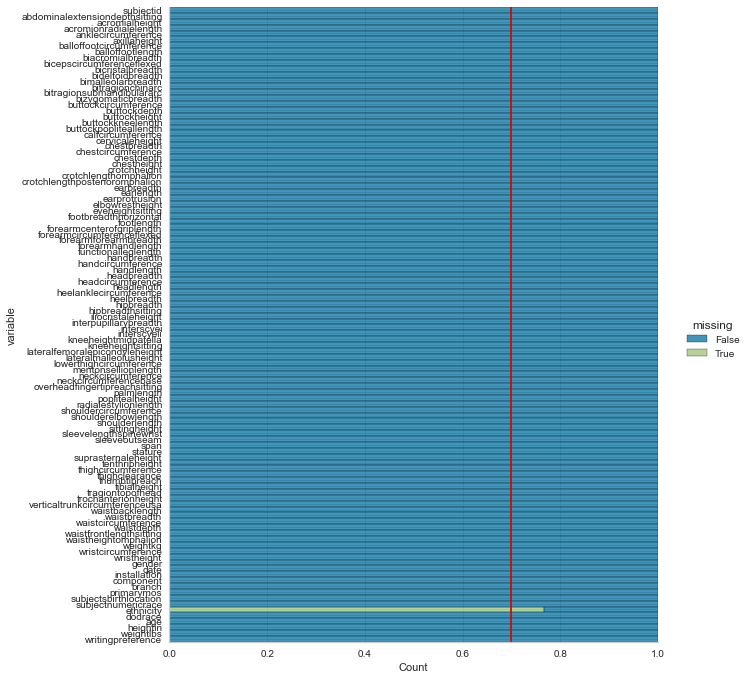

In [26]:
show_nulls(df);

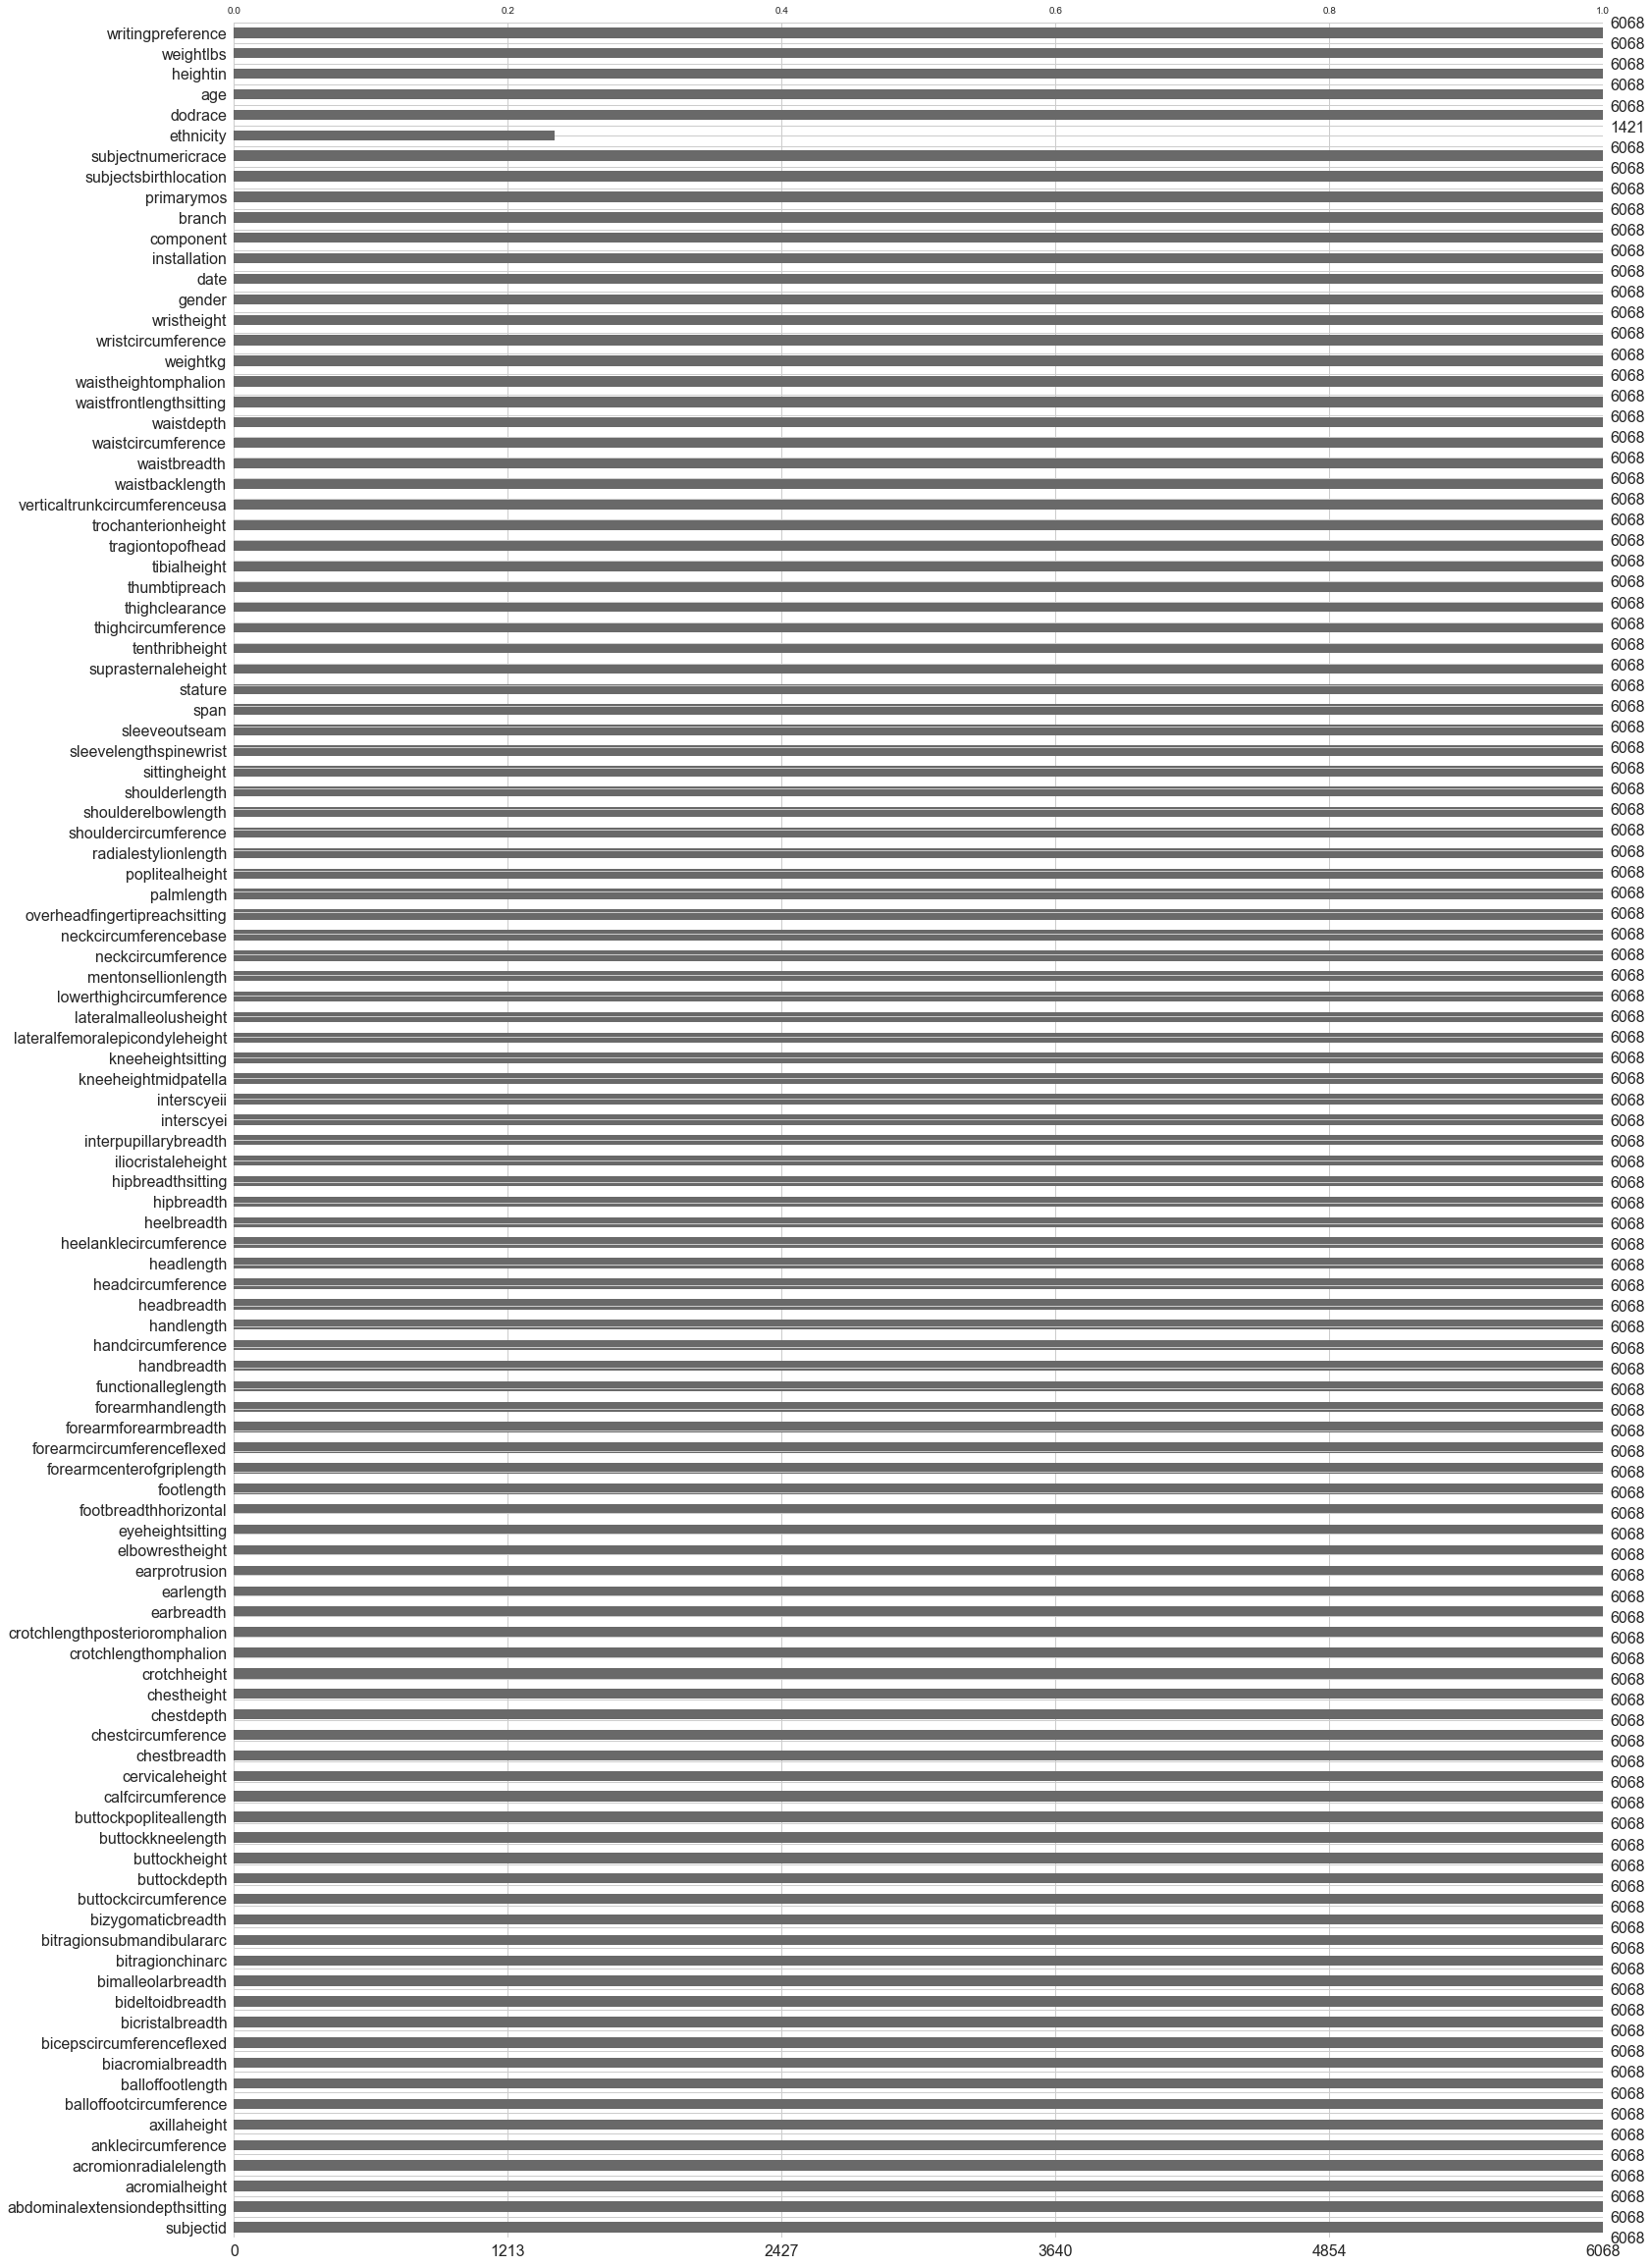

In [27]:
msno.bar(df);

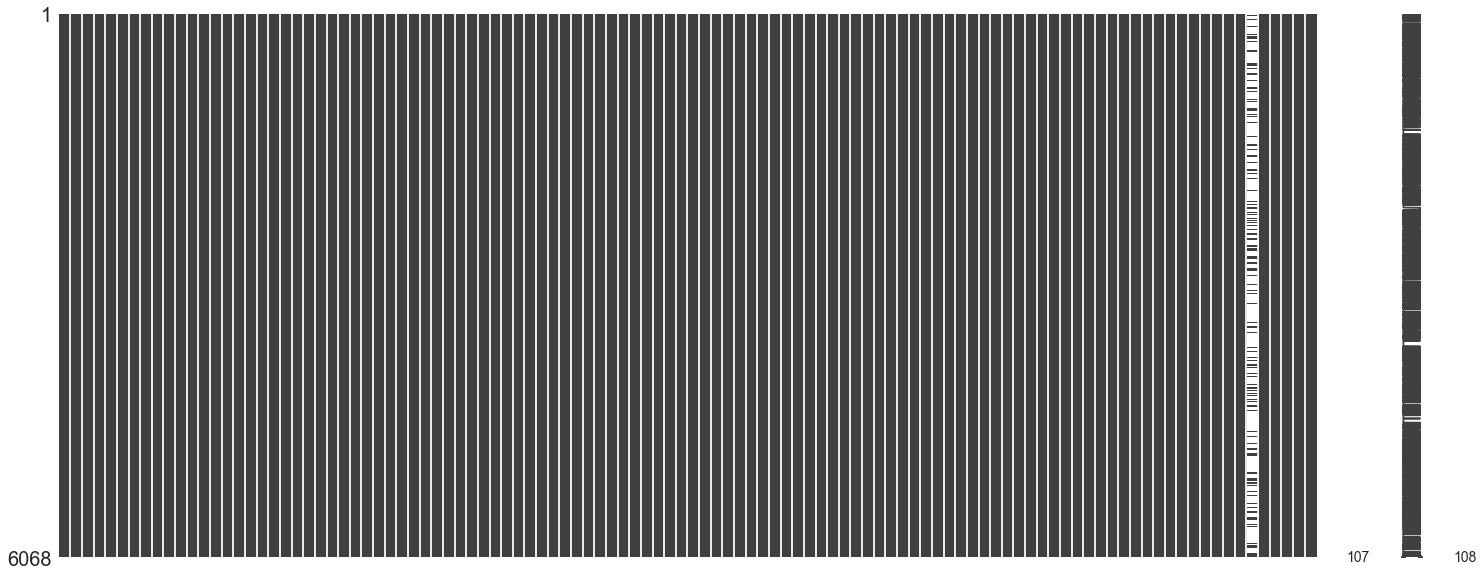

In [28]:
msno.matrix(df);

In [29]:
df.nunique().sort_values()

gender                               2
writingpreference                    3
branch                               3
component                            3
dodrace                              7
installation                        12
earprotrusion                       22
earbreadth                          22
heightin                            29
earlength                           36
bimalleolarbreadth                  37
handbreadth                         38
age                                 42
heelbreadth                         42
subjectnumericrace                  44
tragiontopofhead                    46
lateralmalleolusheight              47
headbreadth                         48
footbreadthhorizontal               49
palmlength                          50
bizygomaticbreadth                  50
headlength                          55
mentonsellionlength                 55
interpupillarybreadth               56
shoulderlength                      78
wristcircumference       

In [30]:
df.gender.value_counts()

Male      4082
Female    1986
Name: gender, dtype: int64

In [31]:
df.corr()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,subjectnumericrace,dodrace,age,heightin,weightlbs
subjectid,1.000,-0.075,-0.056,-0.038,-0.070,-0.055,-0.072,0.001,-0.082,-0.071,0.029,-0.081,-0.049,-0.086,-0.053,-0.054,-0.015,-0.070,-0.023,-0.031,0.043,-0.049,-0.065,-0.020,-0.069,-0.033,-0.040,-0.022,-0.044,-0.189,0.051,-0.124,-0.091,-0.002,-0.102,-0.045,-0.061,-0.096,-0.074,-0.086,-0.048,-0.106,-0.071,-0.086,-0.047,-0.047,-0.066,-0.066,-0.079,-0.005,-0.007,-0.020,-0.055,-0.050,-0.061,-0.076,-0.020,-0.060,0.023,-0.108,-0.025,-0.038,-0.082,-0.092,-0.181,-0.051,-0.009,-0.049,-0.091,-0.066,-0.104,-0.076,-0.047,-0.024,-0.095,-0.065,-0.073,-0.003,-0.031,-0.106,-0.103,-0.072,-0.005,-0.046,-0.083,-0.040,-0.063,-0.066,-0.048,-0.149,-0.044,-0.067,-0.101,-0.038,0.011,0.022,-0.047,-0.055,-0.070
abdominalextensiondepthsitting,-0.075,1.000,0.361,0.322,0.525,0.291,0.459,0.342,0.422,0.691,0.506,0.724,0.372,0.529,0.622,0.497,0.741,0.842,0.258,0.483,0.333,0.657,0.346,0.631,0.826,0.780,0.305,0.203,0.467,0.210,0.248,0.402,0.133,0.256,0.282,0.440,0.354,0.356,0.630,0.729,0.318,0.424,0.426,0.463,0.311,0.341,0.371,0.342,0.509,0.439,0.597,0.558,0.268,0.256,0.603,0.546,0.288,0.359,0.236,0.354,0.674,0.298,0.659,0.629,0.329,0.322,0.163,0.291,0.640,0.297,0.193,0.277,0.430,0.287,0.328,0.317,0.362,0.304,0.732,0.725,0.397,0.275,0.184,0.244,0.730,0.572,0.860,0.940,0.959,0.579,0.162,0.826,0.551,0.389,0.021,-0.079,0.381,0.300,0.794
acromialheight,-0.056,0.361,1.000,0.872,0.512,0.987,0.693,0.803,0.736,0.529,0.409,0.633,0.706,0.569,0.582,0.478,0.302,0.356,0.871,0.818,0.756,0.414,0.984,0.550,0.538,0.294,0.960,0.902,0.354,0.421,0.366,0.434,0.269,0.283,0.813,0.667,0.831,0.850,0.640,0.578,0.866,0.895,0.712,0.719,0.758,0.381,0.443,0.561,0.801,0.449,0.227,0.122,0.934,0.336,0.532,0.596,0.899,0.934,0.861,0.683,0.337,0.543,0.631,0.655,0.869,0.717,0.896,0.826,0.693,0.892,0.543,0.821,0.875,0.883,0.886,0.980,0.985,0.947,0.294,0.457,0.807,0.893,0.319,0.887,0.739,0.729,0.447,0.413,0.372,0.605,0.933,0.685,0.735,0.923,-0.003,-0.235,0.079,0.945,0.702
acromionradialelength,-0.038,0.322,0.872,1.000,0.425,0.862,0.606,0.734,0.672,0.461,0.352,0.567,0.617,0.518,0.513,0.425,0.266,0.307,0.821,0.784,0.745,0.358,0.870,0.475,0.479,0.279,0.846,0.856,0.259,0.320,0.319,0.366,0.227,-0.011,0.642,0.584,0.756,0.823,0.563,0.509,0.841,0.825,0.630,0.637,0.726,0.327,0.401,0.499,0.715,0.440,0.201,0.105,0.863,0.336,0.476,

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: dodrace, dtype: int64


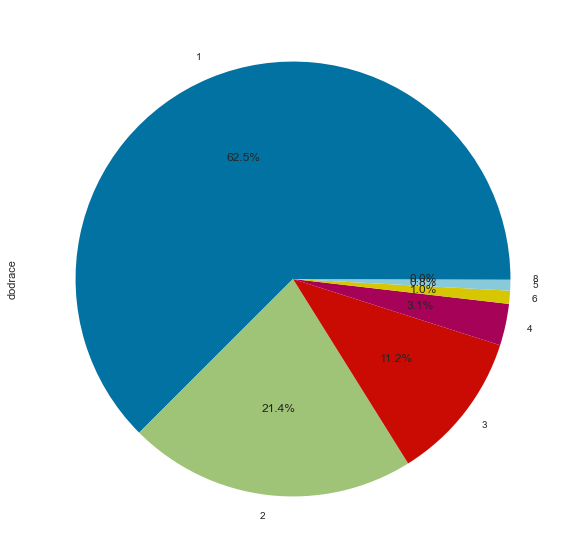

In [32]:
print(df["dodrace"].value_counts())
df["dodrace"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

In [33]:
df = df[df.dodrace.isin([1,2,3])]
df["dodrace"] = df.dodrace.map({1: "White", 2: "Black", 3: "Hispanic"})
df['dodrace'].iplot(kind='hist')

In [34]:
df.groupby(["component"])["dodrace"].value_counts(normalize=True)

component            dodrace 
Army National Guard  White      0.712
                     Black      0.191
                     Hispanic   0.097
Army Reserve         White      0.551
                     Black      0.251
                     Hispanic   0.198
Regular Army         White      0.617
                     Black      0.253
                     Hispanic   0.130
Name: dodrace, dtype: float64

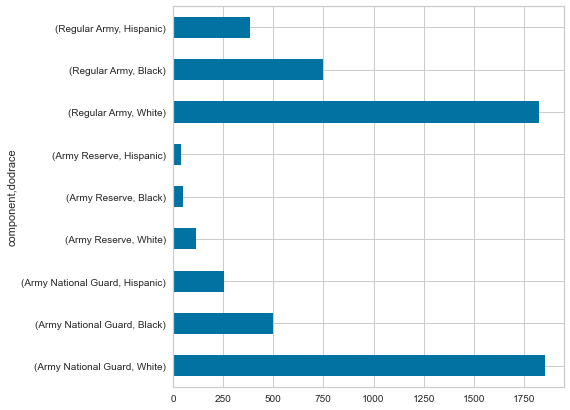

In [35]:
df.groupby(["component"])["dodrace"].value_counts().plot(kind="barh", figsize=(7,7));

In [36]:
df.groupby(["component", "branch"])["dodrace"].value_counts(normalize=True)

component            branch                  dodrace 
Army National Guard  Combat Arms             White      0.803
                                             Black      0.102
                                             Hispanic   0.095
                     Combat Service Support  White      0.669
                                             Black      0.228
                                             Hispanic   0.104
                     Combat Support          White      0.685
                                             Black      0.235
                                             Hispanic   0.080
Army Reserve         Combat Arms             White      0.833
                                             Hispanic   0.167
                     Combat Service Support  White      0.603
                                             Hispanic   0.221
                                             Black      0.176
                     Combat Support          Black      0.431
                

In [37]:
for col in df.select_dtypes("object"):
  print(f"{col} has {df[col].nunique()} unique value")

gender has 2 unique value
date has 253 unique value
installation has 12 unique value
component has 3 unique value
branch has 3 unique value
primarymos has 281 unique value
subjectsbirthlocation has 136 unique value
ethnicity has 157 unique value
dodrace has 3 unique value
writingpreference has 3 unique value


In [38]:
df.ethnicity.value_counts(dropna=False)

# çok fazla sınıfa ait düşük sayıda gözlem var 

NaN                                                   4644
Mexican                                                356
Puerto Rican                                           183
Caribbean Islander                                     123
Cherokee                                                60
Dominican                                               32
Colombian                                               17
Cuban                                                   17
Arab or Middle Eastern                                  16
Salvadoran                                              16
Filipino                                                14
Japanese                                                12
Mexican Puerto Rican                                    10
Honduran                                                 9
Panamanian                                               9
Peruvian                                                 9
Dominican Puerto Rican                                  

In [39]:
df.subjectnumericrace.value_counts()

# çok fazla sınıfa ait düşük sayıda gözlem var

1        3559
2        1025
3         541
31        159
8         106
51        102
21         60
23         34
28         26
251        20
41         19
18         16
61         15
25         13
38          9
351         9
231         6
42          6
62          6
35          5
235         4
43          3
63          3
218         3
431         2
2351        2
423         2
2518        2
4251        1
238         1
318         1
451         1
4           1
425         1
428         1
651         1
6           1
631         1
358         1
42351       1
Name: subjectnumericrace, dtype: int64

In [40]:
(df.subjectnumericrace==df.dodrace).value_counts()

False    5769
dtype: int64

In [41]:
drop_list = ["ethnicity", "date", "installation", "component", "branch", "primarymos", "weightlbs", "heightin", "subjectid", "subjectnumericrace"]

In [42]:
df.drop(drop_list, axis=1, inplace=True)

In [43]:
len(drop_list)

10

In [44]:
df.shape

(5769, 98)

<Figure size 720x360 with 0 Axes>

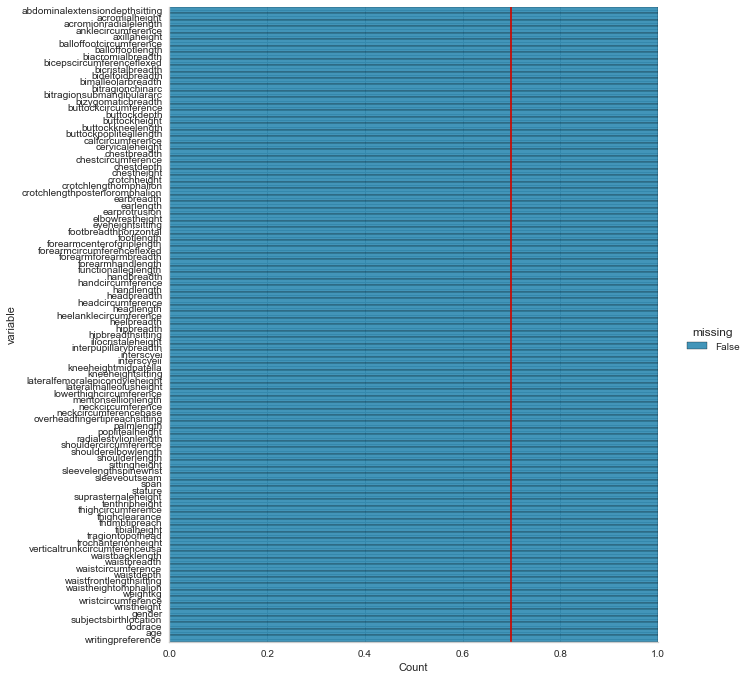

In [45]:
show_nulls(df);

In [46]:
df.reset_index(drop=True, inplace=True)

# Sildiğimiz veriler nedeniyle yeniden indekslememiz gerekiyor.

In [47]:
df.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,gender,subjectsbirthlocation,dodrace,age,writingpreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,North Dakota,White,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,New York,White,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,New York,Black,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Wisconsin,White,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,North Carolina,Black,21,Right hand


In [48]:
df.shape

(5769, 98)

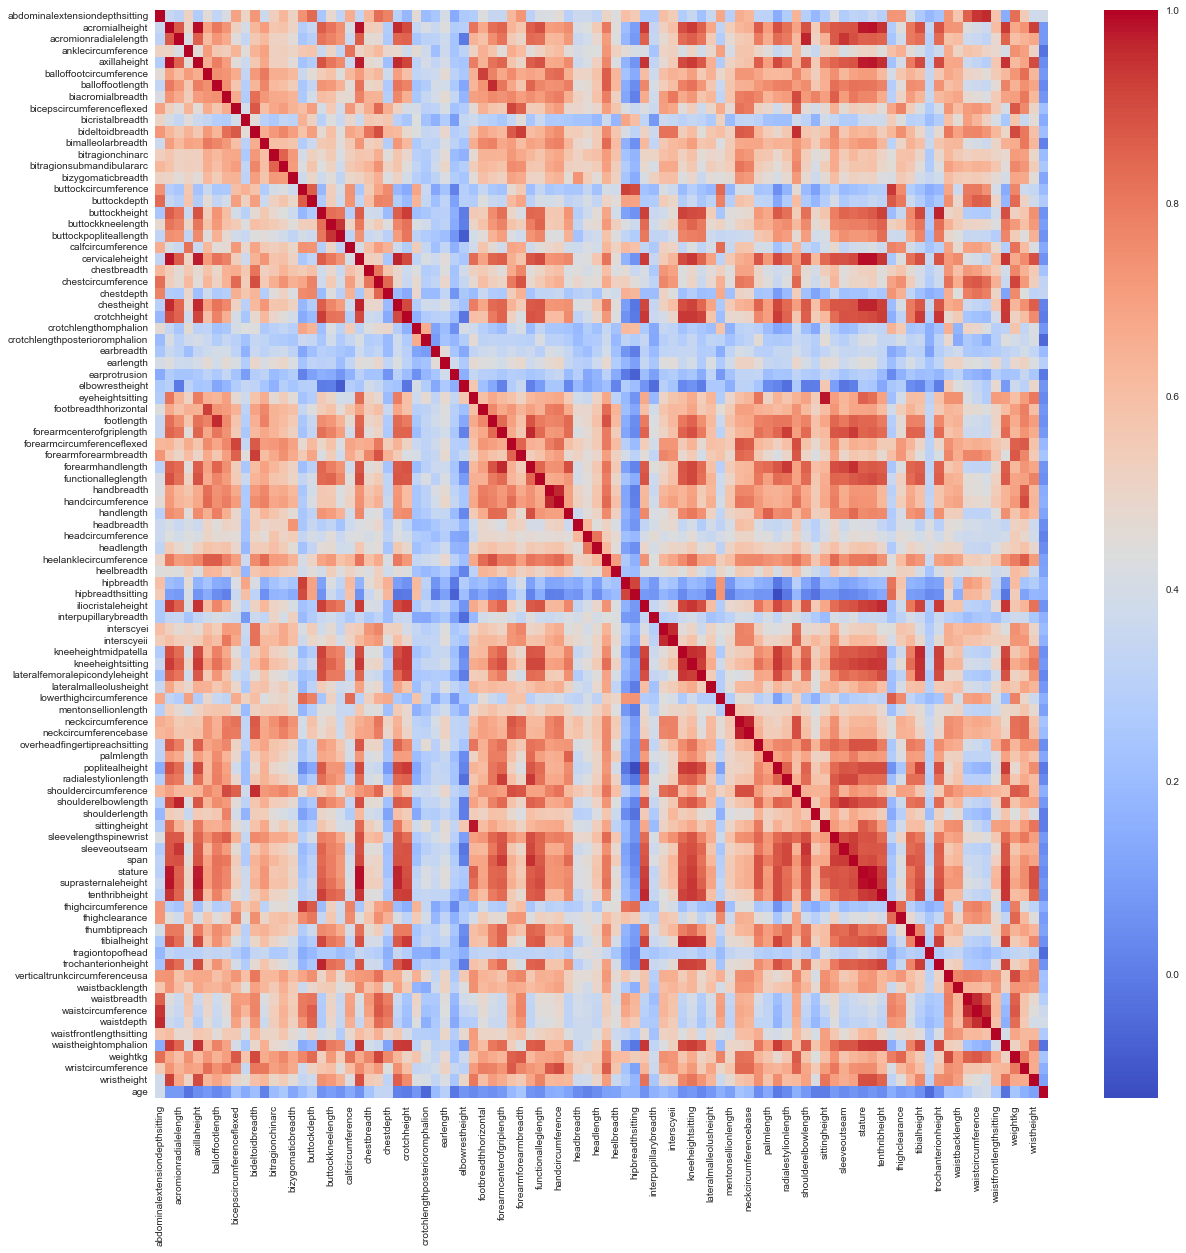

In [49]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap ="coolwarm");

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [50]:
X = df.drop("dodrace",axis=1)
y= df.dodrace

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 101)

In [52]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [53]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [54]:
cat = X_train.select_dtypes("object").columns
cat 

Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object')

In [55]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [56]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

pipe_log_model = Pipeline(steps=operations)

In [57]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[239  14   7]
 [  5 111  20]
 [ 25  89 644]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       260
    Hispanic       0.52      0.82      0.63       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   38   29]
 [  20  456   67]
 [  56  363 2615]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.53      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.88      4615



In [58]:
scoring = {"precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"]),
           "f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"])}

In [59]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic    0.490
train_precision_Hispanic   0.533
test_recall_Hispanic       0.773
train_recall_Hispanic      0.839
test_f1_Hispanic           0.599
train_f1_Hispanic          0.652
dtype: float64

### Logistic Model GridsearchCV

In [61]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])
# The variable created because our aim is to increase the Recall score of the Hispanic class.

In [62]:
param_grid = {
    "log__C": [0.1, 0.5, 1],
    'log__penalty': ["l1", "l2", "elasticnet"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [63]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)
# Find the best parameters to improve Hispanic scores.

In [64]:
log_model_grid.fit(X_train,y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.1, 0.5, 1],
                         'log__penalty': ['l1', 'l2', 'elasticnet'],
                         'log__solver': ['liblinear', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [65]:
log_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(C=1, class_weight='balanced',
                                    max_iter=10000, random_state=101))])

In [66]:
log_model_grid.best_params_

{'log__C': 1, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [67]:
log_model_grid.best_index_

15

In [68]:
pd.DataFrame(log_model_grid.cv_results_).loc[7, ["mean_test_score", "mean_train_score"]]

mean_test_score     NaN
mean_train_score    NaN
Name: 7, dtype: object

In [69]:
log_model_grid.best_score_

0.7733333333333333

In [70]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[239  14   7]
 [  5 111  20]
 [ 25  89 644]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       260
    Hispanic       0.52      0.82      0.63       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   38   29]
 [  20  456   67]
 [  56  363 2615]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.53      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.88      4615



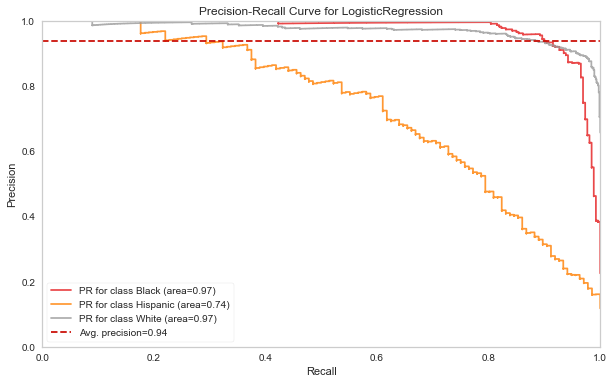

In [71]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, 
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

# Look at Precision Recall Curve as it is an unstable data set.
# Overall success in detecting Hispanics is 73%.

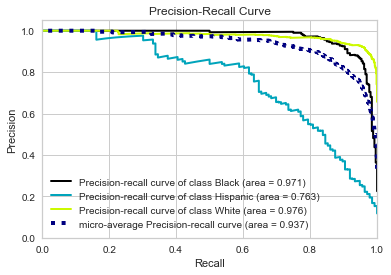

In [77]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [78]:
y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.7628675854244271

In [79]:
viz.score_

{'Black': 0.9739842474085247,
 'Hispanic': 0.7356074404907286,
 'White': 0.9714326382129347,
 'micro': 0.9382550139663279}

In [80]:
viz.score_["Hispanic"]

0.7356074404907286

In [81]:
y_pred = log_model_grid.predict(X_test)

log_AP = viz.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## Lojistic Regression solver "liblenear" for small dataset

In [82]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                    random_state=101, solver="liblinear", penalty="l1"))]

pipe_log_model_libl = Pipeline(steps=operations)

In [83]:
pipe_log_model_libl.fit(X_train,y_train)
eval_metric(pipe_log_model_libl, X_train, y_train, X_test, y_test)

Test_Set
[[245   4  11]
 [  5  96  35]
 [ 18  34 706]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.93       260
    Hispanic       0.72      0.71      0.71       136
       White       0.94      0.93      0.94       758

    accuracy                           0.91      1154
   macro avg       0.86      0.86      0.86      1154
weighted avg       0.91      0.91      0.91      1154


Train_Set
[[ 975   19   44]
 [  29  386  128]
 [  43  146 2845]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.94      1038
    Hispanic       0.70      0.71      0.71       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.86      0.86      4615
weighted avg       0.91      0.91      0.91      4615



In [84]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000, 
                                                                    random_state=101,solver="liblinear", penalty="l1"))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic    0.661
train_precision_Hispanic   0.701
test_recall_Hispanic       0.635
train_recall_Hispanic      0.703
test_f1_Hispanic           0.646
train_f1_Hispanic          0.702
dtype: float64

## 2. SVC

### Vanilla SVC model 

In [85]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight="balanced",random_state=101))]

pipe_svc_model = Pipeline(steps=operations_svc)

In [86]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

# SVC scores are close to Logistic Regression scores.

Test_Set
[[240  12   8]
 [  5 111  20]
 [ 20 109 629]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       260
    Hispanic       0.48      0.82      0.60       136
       White       0.96      0.83      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.86      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 956   42   40]
 [  23  456   64]
 [  54  426 2554]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.49      0.84      0.62       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.90      0.86      0.87      4615



In [87]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic    0.451
train_precision_Hispanic   0.495
test_recall_Hispanic       0.760
train_recall_Hispanic      0.835
test_f1_Hispanic           0.565
train_f1_Hispanic          0.622
dtype: float64

###  SVC Model GridsearchCV

In [89]:
param_grid = {
    'svc__C': [0.5, 1,2,3],
    'svc__gamma': ["scale", "auto", 1, 0.1, 0.01]
}

In [90]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)

In [91]:
svm_model_grid.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.5, 1, 2, 3],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [92]:
svm_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('svc', SVC(C=3, class_weight='balanced', random_state=101))])

In [93]:
svm_model_grid.best_params_

{'svc__C': 3, 'svc__gamma': 'scale'}

In [94]:
svm_model_grid.best_index_

15

In [95]:
pd.DataFrame(svm_model_grid.cv_results_).loc[3, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.753
mean_train_score   0.822
Name: 3, dtype: object

In [96]:
svm_model_grid.best_score_
# Grid Search found the best score as 0.76. 
# A score close to the score we achieved with Cross Validation above

0.7678451178451179

In [97]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)
# After the Grid Search process, the precision value of the Hispanic class increased,
# other scores did not change much. 
# The Logistic model approaches its scores:

Test_Set
[[240  11   9]
 [  6 109  21]
 [ 22  87 649]]
              precision    recall  f1-score   support

       Black       0.90      0.92      0.91       260
    Hispanic       0.53      0.80      0.64       136
       White       0.96      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.82      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 978   31   29]
 [  11  473   59]
 [  44  326 2664]]
              precision    recall  f1-score   support

       Black       0.95      0.94      0.94      1038
    Hispanic       0.57      0.87      0.69       543
       White       0.97      0.88      0.92      3034

    accuracy                           0.89      4615
   macro avg       0.83      0.90      0.85      4615
weighted avg       0.92      0.89      0.90      4615



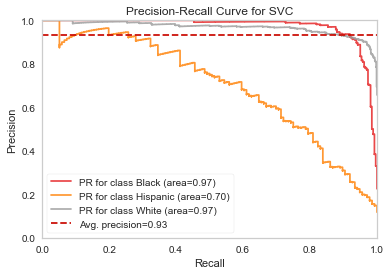

In [98]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(C=1, class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, 
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

# In the Logistic model, the overall performance of the Hispanic class in PrecisionRecall was 73%, here it decreased to 71%.

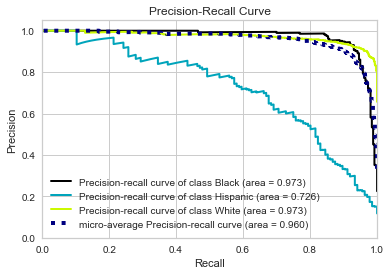

In [99]:
operations = [("OneHotEncoder", column_trans), ("svc", SVC(C=1, class_weight="balanced",random_state=101, probability=True))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

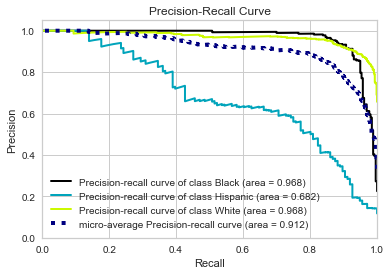

In [100]:
operations = [("OneHotEncoder", column_trans), ("svc", SVC(C=1, class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)

#y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, decision_function)
plt.show();

In [101]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

### Vanilla RF Model

In [119]:
cat

Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object')

In [120]:
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

In [121]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [122]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

Test_Set
[[191   0  69]
 [ 10   6 120]
 [ 10   2 746]]
              precision    recall  f1-score   support

       Black       0.91      0.73      0.81       260
    Hispanic       0.75      0.04      0.08       136
       White       0.80      0.98      0.88       758

    accuracy                           0.82      1154
   macro avg       0.82      0.59      0.59      1154
weighted avg       0.82      0.82      0.77      1154


Train_Set
[[1038    0    0]
 [   0  542    1]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [123]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]
model = Pipeline(steps=operations_rf)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic    0.777
train_precision_Hispanic   1.000
test_recall_Hispanic       0.026
train_recall_Hispanic      1.000
test_f1_Hispanic           0.050
train_f1_Hispanic          1.000
dtype: float64

### RF Model GridsearchCV

In [130]:
param_grid = {'RF_model__n_estimators':[400,500],
             'RF_model__max_depth':[2,3]} #'min_samples_split':[18,20,22], 'max_features': ['auto', None, 15, 20]              

In [131]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]

model = Pipeline(steps=operations_rf)
rf_grid_model = GridSearchCV(model,
                             param_grid,
                             verbose=3,
                             scoring=recall_Hispanic,
                             n_jobs=-1,
                             return_train_score=True)

In [132]:
rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__n_estimators': [400, 500]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [133]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=2,
                                        n_estimators=400, random_state=101))])

In [134]:
rf_grid_model.best_params_

{'RF_model__max_depth': 2, 'RF_model__n_estimators': 400}

In [135]:
rf_grid_model.best_index_

0

In [136]:
pd.DataFrame(rf_grid_model.cv_results_).loc[0, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.610
mean_train_score   0.646
Name: 0, dtype: object

In [137]:
rf_grid_model.best_score_

0.6095820591233435

In [138]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[174  50  36]
 [ 16  76  44]
 [ 91 244 423]]
              precision    recall  f1-score   support

       Black       0.62      0.67      0.64       260
    Hispanic       0.21      0.56      0.30       136
       White       0.84      0.56      0.67       758

    accuracy                           0.58      1154
   macro avg       0.56      0.60      0.54      1154
weighted avg       0.72      0.58      0.62      1154


Train_Set
[[ 702  204  132]
 [  45  346  152]
 [ 246 1105 1683]]
              precision    recall  f1-score   support

       Black       0.71      0.68      0.69      1038
    Hispanic       0.21      0.64      0.31       543
       White       0.86      0.55      0.67      3034

    accuracy                           0.59      4615
   macro avg       0.59      0.62      0.56      4615
weighted avg       0.75      0.59      0.64      4615



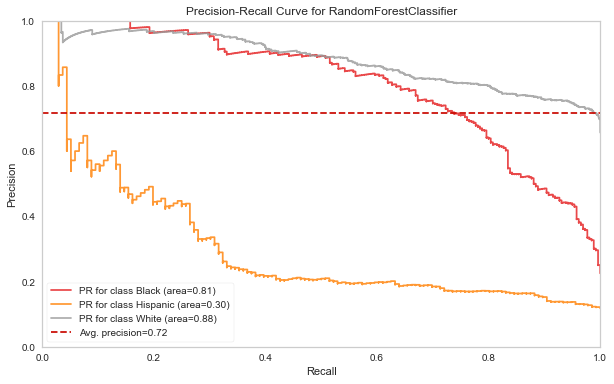

In [139]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                    max_depth=2, n_estimators=400, random_state=101))]

model = Pipeline(steps=operations_rf)

viz = PrecisionRecallCurve(
    model,
    per_class=True, 
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [140]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [142]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

pipe_model_xgb = Pipeline(steps=operations_xgb)

pipe_model_xgb.fit(X_train, y_train)

[21:05:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_byno...
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=101, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=None, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [143]:
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([2.8330264 , 0.50703142, 0.50703142, ..., 0.50703142, 1.4820167 ,
       0.50703142])

In [144]:
comp = pd.DataFrame(classes_weights, columns=["weights"], index = y_train.index)

comp["label"] = y_train
comp.head()

,weights,label
893,2.833,Hispanic
196,0.507,White
3821,0.507,White
3206,0.507,White
4500,1.482,Black


In [145]:
comp.groupby("label")["weights"].value_counts()

label     weights
Black     1.482      1038
Hispanic  2.833       543
White     0.507      3034
Name: weights, dtype: int64

In [146]:
pipe_model_xgb.fit(X_train,y_train, XGB_model__sample_weight=classes_weights)
# weight parameter in XGBoost is per instance not per class. 
#Therefore, we need to assign the weight of each class to its instances, which is the same thing.

[21:06:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_byno...
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=101, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=None, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [147]:
eval_metric(pipe_model_xgb, X_train, y_train, X_test, y_test)

Test_Set
[[231   2  27]
 [ 11  64  61]
 [ 21  20 717]]
              precision    recall  f1-score   support

       Black       0.88      0.89      0.88       260
    Hispanic       0.74      0.47      0.58       136
       White       0.89      0.95      0.92       758

    accuracy                           0.88      1154
   macro avg       0.84      0.77      0.79      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [148]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5, return_train_score=True,
                        fit_params={"XGB_model__sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

[21:06:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:06:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:06:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:06:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

test_precision_Hispanic    0.695
train_precision_Hispanic   1.000
test_recall_Hispanic       0.427
train_recall_Hispanic      1.000
test_f1_Hispanic           0.528
train_f1_Hispanic          1.000
dtype: float64

### XGBoost Model GridsearchCV

In [153]:
param_grid = {"XGB_model__n_estimators":[20, 40],
              'XGB_model__max_depth':[1,2],
              "XGB_model__learning_rate": [0.03, 0.05],
              "XGB_model__subsample":[0.8, 1],
              "XGB_model__colsample_bytree":[0.8, 1]}

In [154]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(model, 
                              param_grid, 
                              scoring=recall_Hispanic,
                              cv=5,
                              n_jobs = -1,
                              return_train_score=True)

In [155]:
xgb_grid_model.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

[22:19:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample...
                                                      subsample=None,
                                                      tree_method=None,
                                                      validate_parameters=None,
                                                      verbosity=None))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.03, 0.05],
                         'XGB_model__max_depth': [1, 2],
                         'XGB_model__n_estimators': [20, 40],
                         'XGB_model__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [156]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_byno...
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=20,
                               n_jobs=4, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=101, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=None, subsample=0.8,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [157]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.05,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 20,
 'XGB_model__subsample': 0.8}

In [158]:
xgb_grid_model.best_index_

12

In [159]:
pd.DataFrame(xgb_grid_model.cv_results_).loc[12, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.562
mean_train_score   0.621
Name: 12, dtype: object

In [160]:
xgb_grid_model.best_score_

0.5617737003058105

In [161]:
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[190  42  28]
 [ 20  70  46]
 [106 188 464]]
              precision    recall  f1-score   support

       Black       0.60      0.73      0.66       260
    Hispanic       0.23      0.51      0.32       136
       White       0.86      0.61      0.72       758

    accuracy                           0.63      1154
   macro avg       0.57      0.62      0.57      1154
weighted avg       0.73      0.63      0.66      1154


Train_Set
[[ 753  165  120]
 [  79  323  141]
 [ 293  776 1965]]
              precision    recall  f1-score   support

       Black       0.67      0.73      0.70      1038
    Hispanic       0.26      0.59      0.36       543
       White       0.88      0.65      0.75      3034

    accuracy                           0.66      4615
   macro avg       0.60      0.66      0.60      4615
weighted avg       0.76      0.66      0.69      4615



[22:26:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


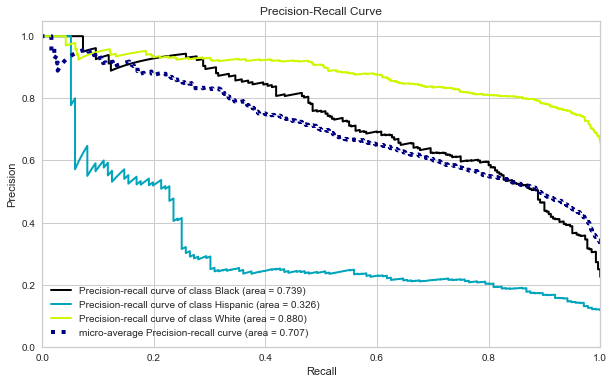

In [162]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(colsample_bytree=0.8, learning_rate=0.05, 
                                            max_depth=2, n_estimators=20, objective='multi:softprob', random_state=101,
                                            subsample=0.8))]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show()

In [163]:
y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.32636838318521066

In [164]:
y_test_dummies

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint8)

In [165]:
y_pred_proba

array([[0.24098502, 0.3198164 , 0.43919855],
       [0.29796344, 0.32085067, 0.3811859 ],
       [0.25836837, 0.43920255, 0.30242908],
       ...,
       [0.3535339 , 0.34918946, 0.29727665],
       [0.34017769, 0.36338475, 0.2964375 ],
       [0.2715865 , 0.29061675, 0.43779668]], dtype=float32)

In [166]:
y_pred = xgb_grid_model.predict(X_test)

xgb_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

---
---

# Comparing Models

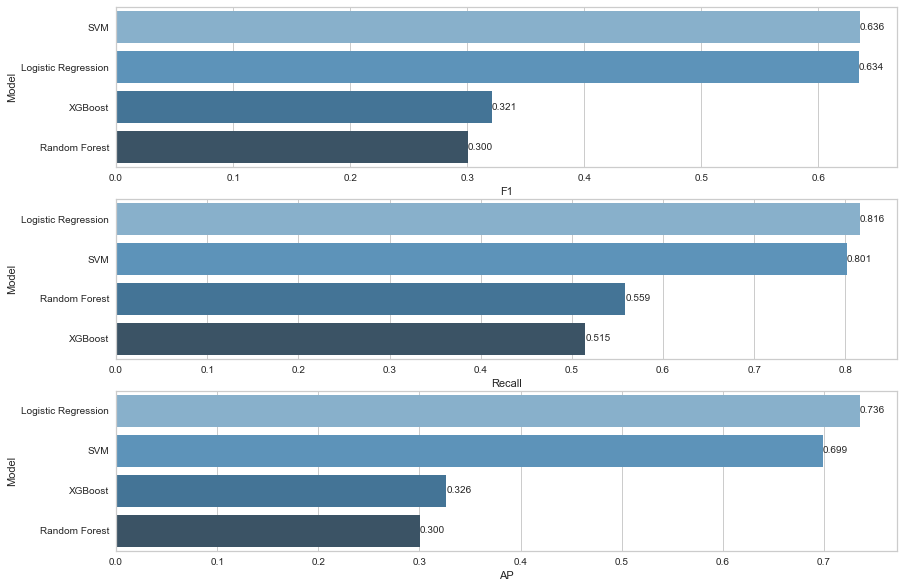

In [168]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

---
---

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [169]:
column_trans_final = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

operations_final = [("OneHotEncoder",column_trans_final),("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

final_model = Pipeline(steps=operations_final)

In [170]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [172]:
X[X.gender=="Male"].describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,age
count,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000
mean,255.449,1442.946,335.819,229.591,1331.098,252.166,201.230,416.004,358.580,275.632,510.928,74.844,331.656,315.718,142.435,1021.294,246.362,889.500,619.217,504.001,392.427,1519.422,289.787,1060.497,254.390,1293.040,847.638,623.143,356.355,36.095,64.171,23.110,244.824,804.885,101.894,271.574,349.573,310.528,580.702,480.929,1132.126,88.380,212.571,193.509,154.184,574.708,199.761,344.002,72.565,346.257,379.948,1063.413,639.949,431.394,450.629,489.367,555.225,492.626,73.062,409.671,122.685,398.192,435.160,1428.469,116.610,430.685,268.314,1179.903,364.306,149.832,918.679,897.179,594.008,1816.629,1758.385,1440.700,1122.444,626.335,180.739,813.085,469.223,131.117,902.587,1666.783,478.018,327.111,943.043,238.560,388.017,1058.240,858.714,176.169,848.762,30.172
std,37.295,62.357,17.281,14.579,58.714,12.894,10.329,19.075,34.512,17.512,32.450,4.097,13.971,16.641,6.142,76.331,26.422,49.412,30.060,26.981,29.698,62.430,18.191,87.117,26.173,56.143,45.923,46.409,29.396,3.012,4.499,2.983,28.714,33.092,5.228,12.928,17.875,21.844,50.830,23.083,55.414,4.350,10.141,9.881,5.454,15.956,6.855,16.409,5.474,24.075,30.120,51.462,34.321,35.081,30.422,27.774,27.522,26.261,5.631,31.848,6.661,25.626,25.429,67.320,6.211,24.525,15.333,63.182,17.980,10.533,35.561,39.686,30.573,83.968,67.658,60.419,52.943,58.346,15.546,43.254,26.170,6.135,48.727,88.905,27.662,34.680,111.463,34.730,29.361,51.599,141.507,8.855,41.139,8.835
min,163.000,1194.000,270.000,156.000,1106.000,186.000,156.000,337.000,246.000,21

In [173]:
male_mean_human = X[X.gender=="Male"].describe(include="all").loc["mean"]
male_mean_human
# I took the average values of all the features below and gave them to the model 
# so that it could make predictions as if they belonged to a human.

abdominalextensiondepthsitting    255.449
acromialheight                   1442.946
acromionradialelength             335.819
anklecircumference                229.591
axillaheight                     1331.098
balloffootcircumference           252.166
balloffootlength                  201.230
biacromialbreadth                 416.004
bicepscircumferenceflexed         358.580
bicristalbreadth                  275.632
bideltoidbreadth                  510.928
bimalleolarbreadth                 74.844
bitragionchinarc                  331.656
bitragionsubmandibulararc         315.718
bizygomaticbreadth                142.435
buttockcircumference             1021.294
buttockdepth                      246.362
buttockheight                     889.500
buttockkneelength                 619.217
buttockpopliteallength            504.001
calfcircumference                 392.427
cervicaleheight                  1519.422
chestbreadth                      289.787
chestcircumference               1

In [174]:
male_mean_human["gender"] = "Male"
male_mean_human["subjectsbirthlocation"] = "California"
male_mean_human["writingpreference"] = "Right hand"

In [175]:
pd.DataFrame(male_mean_human).T

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,gender,subjectsbirthlocation,age,writingpreference
mean,255.449,1442.946,335.819,229.591,1331.098,252.166,201.230,416.004,358.580,275.632,510.928,74.844,331.656,315.718,142.435,1021.294,246.362,889.500,619.217,504.001,392.427,1519.422,289.787,1060.497,254.390,1293.040,847.638,623.143,356.355,36.095,64.171,23.110,244.824,804.885,101.894,271.574,349.573,310.528,580.702,480.929,1132.126,88.380,212.571,193.509,154.184,574.708,199.761,344.002,72.565,346.257,379.948,1063.413,639.949,431.394,450.629,489.367,555.225,492.626,73.062,409.671,122.685,398.192,435.160,1428.469,116.610,430.685,268.314,1179.903,364.306,149.832,918.679,897.179,594.008,1816.629,1758.385,1440.700,1122.444,626.335,180.739,813.085,469.223,131.117,902.587,1666.783,478.018,327.111,943.043,238.560,388.017,1058.240,858.714,176.169,848.762,Male,California,30.172,Right hand


In [176]:
final_model.predict(pd.DataFrame(male_mean_human).T) 

array(['Hispanic'], dtype=object)

In [177]:
y[201] # real value

'Hispanic'

In [178]:
final_model.predict(X.loc[[201]]) # estimated value   

array(['Hispanic'], dtype=object)

In [181]:
y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7831660810065028

In [182]:
cohen_kappa_score(y_test, y_pred)

0.7739520999384765

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___